<h1 style="direction: rtl"> <b> תרגול  11: סיכום על יציבות בחד מימד
</b> </h1>

#### imports and helper functions ####

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [2]:
def solve_recursion(f: callable, t_span: (int, int)=(0,1), y0: np.array or float=1)->np.array:
    """Solve the recurrence y(t+1)=f(t,y(t)) in t_span=(t0,tf) starting at y(t0)=y0. Return solution array y[0:tf-t0+1, ...]."""
    y0 = np.array(y0)
    t0, tf = t_span

    t = np.arange(t0, tf+1)
    y = np.zeros((len(t), *y0.shape))
    y[0,...]=y0

    for i in range(len(t)-1):
        y[i+1,...] = f(t[i,...],y[i,...])
    return y

In [3]:
def cobweb_line(N,y0=0):
    """"Extract the cobweb line (N0,0)-(N0,N1)-(N1,N1)- from N."""
    x = np.zeros(2*len(N)-1)
    y = np.zeros(2*len(N)-1)
    x[::2] = N
    x[1::2] = N[:-1]
    y[0]=y0
    y[1::2] = N[1:]
    y[2::2] = N[1:]
    return x,y

In [4]:
def plot_func_across_x(f):
    """Plot the function f(x) across the x axis"""
    x_min, x_max = plt.xlim()
    x_func = np.linspace(x_min, x_max)
    y_func = f(x_func)
    plt.plot(x_func,y_func,'k')
    # restore the original limits
    plt.xlim(x_min,x_max)

In [5]:
def frame_cobweb(labels=None, colors=None):
    """Add the cobweb xlable, ylable, and legend."""
    plt.xlabel(r'$N\left(t\right)$')
    plt.ylabel(r'$N\left(t+1\right)$')

    # we go over all labels ('label1','label2')
    # make sure it is in a tuple
    # None -> empty tuple ()
    # 'string' -> ('string')
    if labels is None:
        labels=()
    if type(labels) is str:
        labels=(labels,)
    # default colors if not provided
    if colors is None:
        colors = [f'C{i}' for i, _ in enumerate(labels)]


    # Add a legend entry for each label + y=x line + function
    legend_elements = [
        *( plt.Line2D([0], [0], color=color) for label,color in zip(labels,colors)) ,
        plt.Line2D([0], [0], color='k', linestyle='--'),
        plt.Line2D([0], [0], color='k'),
                   ]
    plt.legend(legend_elements,[*labels,'$y=x$','function'],fontsize='xx-small')


def clamp_to_1st_quadrant():
    """Change the x and y limits to show the first quadrant 0<x and 0<y only."""
    x_min, x_max = plt.xlim()
    y_min, y_max = plt.ylim()
    x_min = max(x_min,0)
    y_min = max(y_min,0)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

In [6]:
def plot_cobweb(N, f,xlim=None,dfdn=None,n_s=1):
    """Plot a cobweb plot of the solution N to the function f(y)."""

    # plot y=x helper line and plot the cobweb
    plt.axline( (0,0),(1,1), linestyle='--',color='k') # y=x

    # plot cobweb
    x, y = cobweb_line(N)
    plt.plot(x,y)

    labels=[r'$N\left(t\right)$']
    colors=None
    if dfdn is not None:
        plt.axline((n_s,n_s),slope=dfdn(n_s),linestyle=':')
        labels.append(f'slope=${dfdn(n_s):.4}$')
        colors=['C0','C0']

    # create equal axis (to taste)
    # plt.axis('scaled')

    clamp_to_1st_quadrant()
    if xlim is not None:
        plt.xlim(0,xlim)
        plt.ylim(0,xlim)
    # draw the function across the figure
    plot_func_across_x(f)
    
    frame_cobweb(labels=labels,colors=colors)

<h3 style="direction: rtl"> <b> נשווה בין מודל לוגיסטי בדיד ורציף:</b> </h3>

<h4 style="direction: rtl"> <b> מודל לוגיסטי בדיד</b> </h4>

<div style="direction: rtl">במודל הבדיד, הייתה לנו משוואת רקורסיה:</div>

$$ N\left(t+1\right) = N\left(t\right)+r N\left(t\right) \left(1-\frac{N\left(t\right)}{K}\right)$$

<div style="direction: rtl">מצאנו את נקודות השבת על ידי <b> השוואה של הזמן עכשיו לזמן הבא</b> </div>

$$ N\left(t+1\right)=N\left(t\right) \rightarrow N_\text{stationary}$$

<div style="direction: rtl">נסמן את נקודת השבת ב-$N^*$</div>

$$ N^* = N^* +N^* r\left(1-\frac{N^*}{K}\right) $$

<div style="direction: rtl">למשוואה הזאת יש שני פתרונות:</div>

$$ N^*=0$$
$$ N^* = K $$

<div style="direction: rtl">שימו לב שאלה לא בהכרח נקודות החיתוך עם הצירים!</div>

$$ N\left(t+1\right) = 0 = N_\text{intersection}+r N_\text{int} \left(1-\frac{N_{int}}{K}\right)$$

$$ N_\text{intersection} = 0 $$
$$ N_\text{intersection} = K\frac{r+1}{r} $$

<div style="direction: rtl">הנקודה האחרונה היא חיתוך עם הצירים, אבל לא נקודת שבת: עם המערכת בנקודה הזאת היא לא תשאר בה!</div>

<div style="direction: rtl">היציבות נקבעת לפי הנגזרת של האוכלוסייה בזמן הבא לפי האוכלוסייה בזמן הנוכחי:</div>

$$ N\left(t+1\right) = N\left(t\right)+r N\left(t\right) \left(1-\frac{N\left(t\right)}{K}\right)$$

$$ \frac{dF}{dN\left(t\right)}= 1+r \left(1-\frac{N\left(t\right)}{K}\right)+N\left(t\right) r \left(-\frac{1}{K}\right) = 1+r-\frac{2r N\left(t\right)}{K} $$

<div style="direction: rtl">בנקודות השבת</div>

$$ \left.\frac{dF}{dN\left(t\right)}\right|_{N\left(t\right)=0}  = 1+r $$

$$ \left.\frac{dF}{dN\left(t\right)}\right|_{N\left(t\right)=K}  = 1-r $$

<div style="direction: rtl"> אפשר להחשיב את ה-cobweb plot בתור גרף של מרחב פאזה, כי אנחנו רואים את כל המצבים האפשריים של המערכת בבת אחת. נראה שזה מאוד עוזר להבין את היציבות של הנקודות. נתחיל קרוב מאוד ל-$K$ ונראה איך היציבות של הנקודה משתנה עם $r$.</div>

In [10]:
import ipywidgets as widgets
r_widget = widgets.BoundedFloatText(value=-0.5,
                                   min=-1, max=2.5, step=0.25,
                                   description='$r$',
                                  )


In [11]:
def plot(r):
    fig, axes = plt.subplots(1,2,figsize=(8,3.5))
    f = lambda t,n: n+r*n*(1-n)
    dfdn = lambda t,n: 1+r*(1-n)+r*n*(-1)
    N = solve_recursion(f,(0,7),0.9)
    plt.sca(axes[0])
    plt.axhline(1,linestyle=':',color='grey')
    plt.plot(N)
    plt.xlabel('time')
    plt.ylabel('population')
    plt.ylim(0,1.5)

    plt.sca(axes[1])
    plot_cobweb(N, lambda x: f(0,x),xlim=2,dfdn=lambda x:  dfdn(0,x),n_s=1)
    plt.xlim(0.8,1.2);plt.ylim(0.8,1.2);plt.title(f'{r=:.4}, slope={1-r:.4}')
    plt.tight_layout()
    plt.show()

widgets.interact(plot, r=r_widget);

interactive(children=(BoundedFloatText(value=-0.5, description='$r$', max=2.5, min=-1.0, step=0.25), Output())…

<div>
    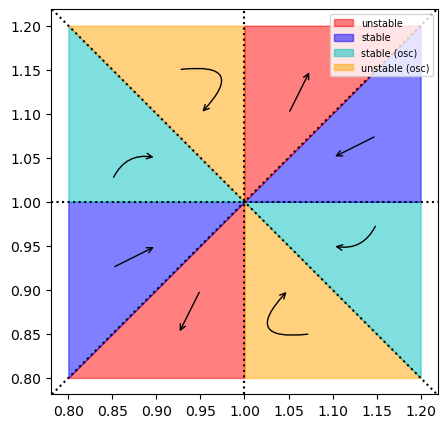
    <span style="direction: rtl; width: 58.000000%; heignt: auto; float: right">
    של לנו ארבעה מקרים:
    <ol> 
        <li> הנגזרת גדולה מ-1: נקודת אי יציבות </li>
        <li> הנגזרת בין 0 ל-1: נקודת יציבות</li>
        <li> הנגזרת בין 1- ל-0: נקודת יציבות אוסילטוריח</li>
        <li> הנגזרת קטנה מ-1-: נקודת אי יציבות אוסילטורית </li>
    </ol>
    </span>
</div>

<h4 style="direction: rtl"> <b> מודל לוגיסטי רציף</b> </h4>

<div style="direction: rtl">במודל הרציף, הייתה לנו משוואה דיפרנציאלית:</div>

$$ \frac{dN}{dt} = F\left[t,N\left(t\right)\right]$$

$$ \frac{dN}{dt} = r N\left(t\right)\left(1-\frac{N\left(t\right)}{K}\right)$$

<div style="direction: rtl">המשוואה הדיפרנציאלית דומה יותר למשוואת ההפרש מאשר למשוואת הרקורסיה</div>

<div style="direction: rtl">מצאנו את נקודות השבת על ידי <b> השוואה של הנגזרת (השינוי) לאפס</b> </div>

$$ \left. \frac{dN}{dt}\right|_{N\left(t\right)}=0 \rightarrow N_\text{stationary}$$

$$ 0 =r N^* \left(1-\frac{N^*}{K}\right) $$

<div style="direction: rtl">למשוואה הזאת יש שני פתרונות:</div>

$$ N^*=0$$
$$ N^* = K $$

<div style="direction: rtl">במקרה הזה, אלו אכן נקודות החיתוך של ציר ה-x</div>

<div style="direction: rtl">היציבות של נקודה נקבעת לפי הנגזרת לפי האוכלוסייה של הנגזרת בזמן </div>

$$ \frac{dN}{dt}=r N\left(t\right) \left(1-\frac{N\left(t\right)}{K}\right)$$

$$ \frac{dF}{dN\left(t\right)}= r \left(1-\frac{N\left(t\right)}{K}\right)+N\left(t\right) r \left(-\frac{1}{K}\right) = r-\frac{2r N\left(t\right)}{K} $$

<div style="direction: rtl">בנקודות השבת</div>

$$ \left.\frac{dF}{dN\left(t\right)}\right|_{N\left(t\right)=0}  = r $$

$$ \left.\frac{dF}{dN\left(t\right)}\right|_{N\left(t\right)=K}  = -r $$

<div style="direction: rtl">גם פה אפשר להסתכל על מרחב הפאזה: עכשיו במקום מרחב האוכלוסייה בזמן הבא כפונקציה של האוכלוסייה הנוכחית, נסתכל על מרחב של הנגזרת כפונקציה של הזמן הנוכחי</div>

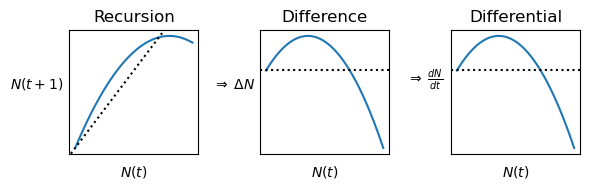

<div style="direction: rtl">המעבר מרקורסיה להפרש הוא רק מתמטי: זה "גזירה" (shear) של המרחב. אנחנו רואים שהיציבות מקודם משתנה, כך שכל הטווח מכווץ ברביע העליון. <br> המעבר מהפרש למשוואה דיפרנציאלי הוא שונה מהותית: במקום לקחת את הצעד בזמן הבא, אנחנו נעים על הגרף, ויש לנו רק יציבות רגילה ואי יציבות רגילה.

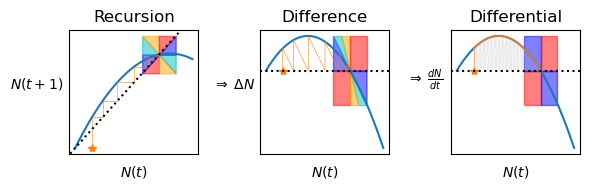

<div style="direction: rtl">במובן מסוים, המודל הרציף יותר קל להבנה: כל עוד הגזרת חיובית, נעים ימינה, וכשהיא שלילית, נעים שמאלה, ונעים יותר לאט בנקודות שבת</div>

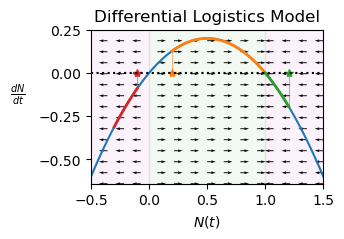

| | Discrete Model Fixed Points and Stability | Continuous Model Fixed Points and Stability |
|-| :------------: | :--------------: |
| Equation type | Recursion (or difference)| Differential|
| Form | $N\left(t+1\right)=F\left[t,N\left(t\right)\right]$ |$\frac{dN}{dt}=F\left[t,N\left(t\right)\right]$ |
| Fixed points | $N\left(t+1\right)=N\left(t\right)=N^*$ | $\left.\frac{dN}{dt}\right|_{N^*}=0$ |
| Stability | $\frac{dF}{dN\left(t\right)}=\frac{dN\left(t+1\right)}{dN\left(t\right)}=\lambda$ |$\frac{dF}{dN\left(t\right)}=\frac{d}{dN\left(t\right)}\frac{dN}{dt}=\alpha$ |
| unstable| $1<\lambda$| $0<\alpha$ |
| stable | $0<\lambda<1$ | $\alpha<0$|
|osc. stable|$-1<\lambda<0$ | $-$|
|osc. unstable|$\lambda<-1$|$-$|